### MAP556, Ecole Polytechnique, 2023-24

# TP 2 - Variance Reduction

We have a model defined by the relationship $Y = f(X)$.
The objective is to estimate the value $\mathbb{E}\bigl[g(Y)\bigl]$, for a certain function $g$ over the set of outputs $Y$. We assume that $g(Y)$ is square-integrable.

Exercise 1. Control Variables
Black-box models representing input-output systems of numerical codes are often computationally expensive. Let's suppose we have a reduced input-output model $Y_r = f_r(X)$ that is easier to simulate for different input values $X$ than the model $Y = f(X)$, and so that we know the quantity $m_r = \mathbb{E}\bigl[g(Y_r)\bigl]$. Furthermore, we assume $\mathbb{E}\bigl[g(Y_r)^2\bigl]<\infty$.

We denote $(X_i)_{1\leq i\leq n}$ as a sequence of independent copies of the input variable $X$, and we define
\begin{eqnarray*}
 I_n&=&\frac{1}{n}\sum_{i=1}^n g(f(X_i)),\qquad
 I_n^c = m_r+\frac{1}{n}\sum_{i=1}^n \bigl( g(f(X_i)) - g(f_r(X_i)) \bigr) .
 \end{eqnarray*}

####  Question 1:
Verify that $I_n$ and $I_n^c$ are unbiased estimators of $\mathbb{E}\bigl[g(Y)\bigl]$, and calculate their variances.

Let's calculate $\mathbb{E}\bigl[I_n\bigl].$\
We have $$\mathbb{E}\bigl[I_n\bigl] = \mathbb{E}\bigl[\frac{1}{n}\sum_{i=1}^n g(f(X_i))\bigl] = \frac{1}{n}\sum_{i=1}^n \mathbb{E}\bigl[g(f(X_i))\bigl] = \mathbb{E}\bigl[g(Y)\bigl]$$ by independance of the $X_i$s and  linearity of the mean function. This equality shows that $I_n$ is indeed an unbiased estimator of $\mathbb{E}\bigl[g(Y)\bigl].$\
The variance is given by $$\mathbb{V}\bigl[I_n\bigl] = \mathbb{V}\bigl[\frac{1}{n}\sum_{i=1}^n g(f(X_i))\bigl] = \frac{1}{n^2}\sum_{i=1}^n \mathbb{V}(g(f(Y))) = \frac{1}{n}\mathbb{V}(g(Y))$$
\
We do the exact same thing with $I_n ^c$ that gives:\
$\mathbb{E}\bigl[I_n ^c\bigl] = \mathbb{E}\bigl[m_r+\frac{1}{n}\sum_{i=1}^n \bigl( g(f(X_i)) - g(f_r(X_i)) \bigr)\bigl] = \mathbb{E}\bigl[I_n\bigr] + m_r - \frac{1}{n}\sum_{i=1}^n \mathbb{E}\bigl[g(f_r(X_i)) \bigr].$\
We have the model :$Y_r = f_r(X)$. So by independance of the $X_i$s we get,
$\frac{1}{n}\sum_{i=1}^n \mathbb{E}\bigl[g(f_r(X_i)) \bigr] = \mathbb{E}\bigl[g(Y_r) \bigr] = m_r.$
This leads us to the fact that $$ \mathbb{E}\bigl[I_n ^c\bigl] = \mathbb{E}\bigl[I_n\bigl] = \mathbb{E}\bigl[g(Y)\bigl]$$

The variance calculation gives us : $$\mathbb{V}\bigl[I_n ^c\bigl] = \frac{1}{n}\mathbb{V}(g(Y) - g(Y_r))$$





#### Question 2:

Assuming that the input variables $X$ follow a uniform distribution on $[0,1]$, $f(x)=e^x$, $f_r(x)=1+x$, and $g(y)=y$.

Simulate both estimators and their asymptotic 95% confidence intervals.

Plot the curves of the empirical means $I_n$ and $I_n^c$.

What is the gain in terms of the number of simulations for the estimator $I_n^c$ to achieve the same asymptotic precision as the naive Monte Carlo method?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [ ]:
N = 1000 # Sample size

integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

############################################
# Calculate the exact value of m_r
# m_r = E[g(Y_r)] = E[1+X] for X ~ U[0,1]
m_r = 1 + 0.5
############################################

############################################
# Simulate N samples of values of Y and Y_control
#Y = ????

#Y_control = ????
X = np.random.rand(N)
Y = np.exp(X)
Y_control = 1 + X
############################################

############################################
# Calculate both estimators and their
# empirical variances
############################################
#Mean_MC = ????
#Variance_MC = ????

#Mean_control = ????
#Variance_control = ????

#halfWidthCI95_MC = ????
#halfWidthCI95_Control = ????
Mean_MC = np.mean(Y)
Variance_MC = np.var(Y)

Mean_control = m_r + np.mean(Y - Y_control)
Variance_control = np.var(Y - Y_control)

halfWidthCI95_MC = 1.96 * np.sqrt(Variance_MC / N)
halfWidthCI95_Control = 1.96 * np.sqrt(Variance_control / N)

############################################
# Gain in terms of number of simulations
# for the same precision

#control_gain = ????
control_gain = Variance_MC / Variance_control
############################################

############################################
# For display: exact value of E[g(Y)]
Esp_gY = np.exp(1.)-1.

print("Sample size = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("MC Estimator: mean = %1.3f emp variance = %1.3f"
%(Mean_MC, Variance_MC))
print("CI(95%%) = [%1.3f,%1.3f] \n"
%(Mean_MC-halfWidthCI95_MC, Mean_MC+halfWidthCI95_MC))

print("Control Estimator: mean = %1.3f empirical variance = %1.3f"
%(Mean_control, Variance_control))
print("CI(95%%) = [%1.3f,%1.3f] \n"
%(Mean_control-halfWidthCI95_Control, Mean_control+halfWidthCI95_Control))

print("Gain in number of simulations with control variable: %1.2f" %control_gain)

Sample size = 1000
Esp_gY = 1.718 

MC Estimator: mean = 1.704 emp variance = 0.239
CI(95%) = [1.674,1.734] 

Control Estimator: mean = 1.713 empirical variance = 0.042
CI(95%) = [1.700,1.725] 

Gain in number of simulations with control variable: 5.66


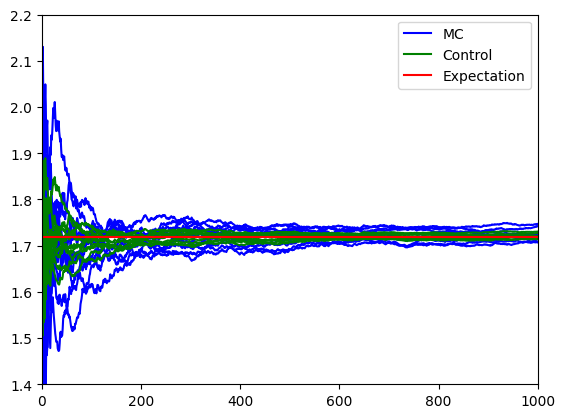

In [ ]:
############################################
## Displaying 10 trajectories
############################################

# Simulating 10 trajectories of the estimators
# I_n and I_n^c
# Expected size of the arrays: M x N
M = 10

#Y = ????
#Ycontrol = ????
#I_n = ????
#Ic_n = ????

## Display the 10 trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

#### Question 3:

Let $(I^j_n)_{1\leq i\leq M}$ and $(I^{c,j}_n)_{1\leq i\leq M}$ be the empirical estimations associated with $M$ independent draws of the two estimators.

Explicitly evaluate $m = \mathbb{E}\bigl[g(Y)\bigl]$ and plot histograms of the errors $(I^j_n - m)_{1 \le j \le M}$ and $(I^{c,j}_n - m)_{1 \le j \le M}$.

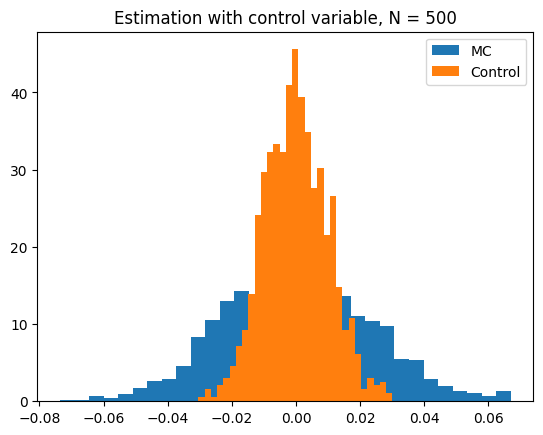

In [ ]:
N = 500 # Sample size
M = 1000 # Number of estimator draws

integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

Esp_gY = np.exp(1.)-1.
m_r = 1.5

###############
# Simulate the samples of values of Y
# and Y_control

#Y = ????
#Ycontrol = ????
X = np.random.rand(M, N)
Y = np.exp(X)
Ycontrol = 1 + X
###############

############################################
# Samples of size M for both estimators

#I_N = ????
#Ic_N = ????
I_N = np.mean(Y, axis=1)
Ic_N = m_r + np.mean(Y - Ycontrol, axis=1)

############################################
## Displaying histograms of errors
## for both estimators

#plt.hist(????, density="True", bins=int(np.sqrt(M)), label="MC")
#plt.hist(????, density="True", bins=int(np.sqrt(M)), label="Control")
plt.hist(I_N - Esp_gY, density="True", bins=int(np.sqrt(M)), label="MC")
plt.hist(Ic_N - Esp_gY, density="True", bins=int(np.sqrt(M)), label="Control")

plt.title("Estimation with control variable, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

#### Question 4: Optimal Control Variable

Now, let's consider the estimator
\begin{eqnarray*}
I_n^\lambda = \lambda  m_r + \frac{1}{n}\sum_{i=1}^n \bigl(g(f(X_i)) - \lambda  g(f_r(X_i))\bigr),
\qquad \lambda \in \mathbb R.
\end{eqnarray*}

Suggest a choice for the parameter $\lambda$.

Plot the trajectories of the empirical means $I_n^\lambda$ obtained with this choice, and then plot the histogram of the errors of this estimator.

In [ ]:
############################################
## Estimating optimal lambda from a small
## number of simulations
############################################
n = 100
X = np.random.rand(n)
Y = np.exp(X)
Y_control = 1 + X

# The optimal lambda is given by Cov(g(Y), g(Y_r)) / Var(g(Y_r))
# We can estimate this empirically from a sample
lambda_opt = np.cov(Y, Y_control)[0, 1] / np.var(Y_control)


## Empirical optimal lambda
#lambda_opt = ????

print("Optimal lambda = %1.3f" %lambda_opt)

Optimal lambda = 1.704


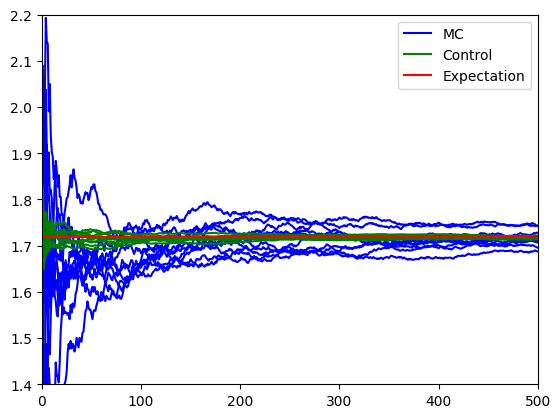

In [ ]:
#############################################
### For histograms: M x N draws
#############################################
M = 1000
N = 500
integers1toN = np.arange(1,N+1)

X = np.random.rand(M, N)
Y = np.exp(X)
Ycontrol = 1 + X

#############################################
### Displaying the first 10 trajectories
#############################################

I_n = np.cumsum(Y[0:10,:], axis=1) / integers1toN
Ic_n = lambda_opt * m_r + np.cumsum(Y[0:10,:] - lambda_opt * Ycontrol[0:10,:], axis=1) / integers1toN

## Display the first 10 trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

In [ ]:
############################################
# Calculate both estimators I_N and I_N control and their
# empirical variances
Mean_MC = np.mean(Y)
Variance_MC = np.var(Y)

Mean_control = lambda_opt * m_r + np.mean(Y - lambda_opt * Ycontrol)
Variance_control = np.var(Y - lambda_opt * Ycontrol)

halfWidthCI95_MC = np.sqrt(Variance_MC / N)*1.96
halfWidthCI95_Control = np.sqrt(Variance_control / N)*1.96

control_gain = Variance_MC/Variance_control

print("Sample size = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("MC Estimator: mean = %1.3f  empirical variance = %1.3f" \
      %(Mean_MC, Variance_MC))
print("CI(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_MC-halfWidthCI95_MC, Mean_MC+halfWidthCI95_MC))

print("Control Estimator: mean = %1.4f  empirical variance = %1.3f" \
      %(Mean_control, Variance_control))
print("CI(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_control-halfWidthCI95_Control, Mean_control+halfWidthCI95_Control))

print("Gain in number of simulations with control variable: %1.2f" %control_gain)

Sample size = 500
Esp_gY = 1.718 

MC Estimator: mean = 1.717  empirical variance = 0.242
CI(95%) = [1.674,1.760] 

Control Estimator: mean = 1.7183  empirical variance = 0.004
CI(95%) = [1.713,1.724] 

Gain in number of simulations with control variable: 61.09


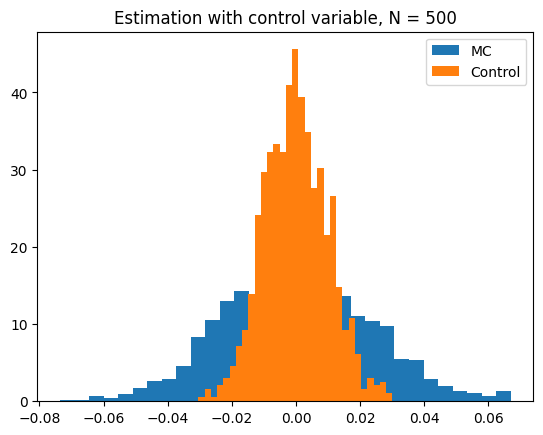

In [ ]:
#############################################
### For the histogramms: evaluate the
## errors for both estimators I_N and I_N control
#############################################

error_N = I_N - Esp_gY
error_control_N = Ic_N - Esp_gY

plt.hist(error_N, density="True", bins=int(np.sqrt(M)), label="MC")

plt.hist(error_control_N, density="True", bins=int(np.sqrt(M)), label="Control")

plt.title("Estimation with control variable, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

### Exercise 2. Antithetic Sampling and Stratification Methods
We assume that the input variables $X$ follow a uniform distribution between $-1$ and $+1$. We are in the situation where $f(x)=e^x$, and $g(y)=y$, and we want to estimate $\mathbb{E}\bigl[g(Y)\bigl]= \mathbb{E}\bigl[e^X\bigl]$.


#### Question 1: Basic Monte Carlo Method

Let $I_n$ be the empirical mean of $n$ independent copies of $X$.

Verify that we have $\mathbb{E}\bigl[e^X\bigl] = \sinh(1)\simeq 1.18$, and $\mbox{Var}(e^X)= \frac{1}{2} (1-e^{-2})\simeq 0.43$.

Plot the curves of the empirical means obtained from multiple realizations and compare them with the desired quantity.





In [ ]:
# Constants to be used for the rest of the exercise

N = 1000 # Sample size
integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

Esp_gY = np.sinh(1.0)
Var_gY = (1.0 - np.exp(-2.))/2.

In [ ]:
############################################
# Complete with N draws from the uniform distribution [-1,1]
# and draws of Y = exp(X)
X = np.random.uniform(-1, 1, N)
Y = np.exp(X)
############################################

############################################
# Store in 'mean' the MC estimation of E[g(Y)],
# in 'var' the empirical variance, and in 'halfWidthCI'
# the half width of the asymptotic 95% confidence interval for E[g(Y)]
mean = np.mean(Y)
var = np.var(Y)
halfWidthCI = 1.96 * np.sqrt(var / N)
############################################

print("MC Estimator \n")

print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY, Var_gY))
print("mean = %1.3f  var = %1.3f" %(mean,var))
print("95%% confidence interval for E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - halfWidthCI, mean + halfWidthCI))
print("Relative error = %1.3f" %(halfWidthCI/mean))

MC Estimator 

Esp_gY = 1.175 Var_gY = 0.432
mean = 1.152  var = 0.406
95% confidence interval for E[g(Y)] = [ 1.113 , 1.191 ] 

Relative error = 0.034


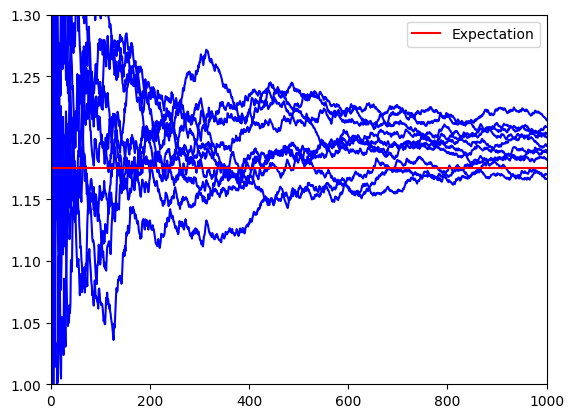

In [ ]:
M = 10 # number of realizations of empirical means

############################################
# Complete with N draws from the uniform distribution [-1,1]
# and antithetic draws
X = np.random.uniform(-1, 1, size=(M, N))
Y = np.exp(X)
I_n =  np.cumsum(Y, axis=1) / integers1toN
############################################

# Displaying trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()

#### Question 2: Antithetic Sampling

Verify that $(f(u)-f(v))(f(-u)-f(-v))\leq 0$, for all $(u,v)\in [-1,1]$, and deduce a antithetic sampling technique based on simulating $n$ uniform variables on $[-1,1]$.

Let $I^{\prime}_n$ be the corresponding empirical estimator.

Plot the curves of the empirical means obtained.

What is the gain in terms of the number of simulations for this estimator, for the same asymptotic accuracy as the naive Monte Carlo method?

In [ ]:
############################################
# Complete with N draws from the uniform distribution [-1,1]
# and antithetic draws
X = np.random.uniform(-1, 1, N)
Z = -X # Antithetic variable
#
############################################

############################################
# Complete with the calculation of the antithetic estimator
mean = np.mean((np.exp(X) + np.exp(Z)) / 2)
var = np.var((np.exp(X) + np.exp(Z)) / 2)
halfWidthCI = 1.96 * np.sqrt(var / N)
############################################

print("Antithetic Estimator \n")

print("Esp_gY = %1.3f" %(Esp_gY))
print("I_prime_mean = %1.3f  empirical variance = %1.3f" %(mean, var))
print("95%% Confidence Interval for E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - halfWidthCI, mean + halfWidthCI))
print("Relative error = %1.3f" %(halfWidthCI/mean))
print("gain in number of simulations compared to MC: %1.2f" %(Var_gY/var))

Antithetic Estimator 

Esp_gY = 1.175
I_prime_mean = 1.180  empirical variance = 0.025
95% Confidence Interval for E[g(Y)] = [ 1.170 , 1.190 ] 

Relative error = 0.008
gain in number of simulations compared to MC: 17.61


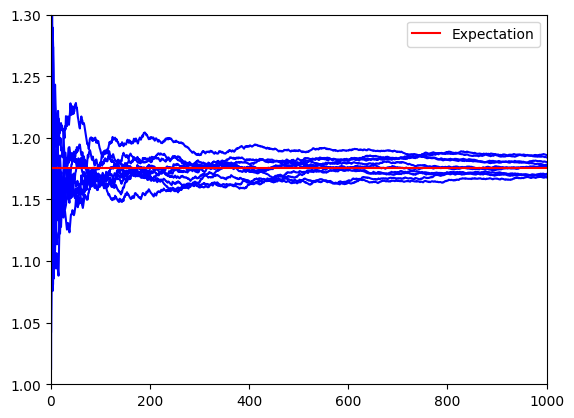

In [ ]:
############################################
## Empirical mean trajectories
############################################

############################################
# Evaluate M trajectories of the empirical estimator I'_n
X = np.random.uniform(-1, 1, size=(M, N))
Z = -X

############################################
# Complete with the calculation of
# antithetic estimator trajectories
I_prime_n = np.cumsum((np.exp(X) + np.exp(Z)) / 2, axis=1) / integers1toN
############################################

# Displaying the estimator trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_prime_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()

#### Question 3: Proportional Stratification
Propose a proportional stratification technique based on simulating uniform variables on $[-1,0]$ and uniform variables on $[0,1]$.

Let $J_n$ be the corresponding estimator. Plot the estimator trajectories as a function of $n$. Does this estimator satisfy the Central Limit Theorem (CLT)? What is the gain in terms of the number of simulations for this estimator, for the same asymptotic accuracy as the naive Monte Carlo method?

Can we explicitly calculate $\mbox{Var}(J_n)$? (see question 5)

In [ ]:
# Proportionnal stratification (we will take N even)
N1 = int(N/2)
N2 = N1

############################################
# Complete with N1 and N2 draws of conditional distributions
# on strata
X1 = np.random.uniform(-1, 0, N1)
X2 = np.random.uniform(0, 1, N2)
############################################

############################################
# Stratified estimator
J_N = 0.5 * np.mean(np.exp(X1)) + 0.5 * np.mean(np.exp(X2))

############################################
# We evaluate the asymptotic variance through simulation
# of the estimator J_N
############################################
M = 1000 # Number of simulations for variance estimation
J_N_samples = np.zeros(M)
for i in range(M):
    X1_sample = np.random.uniform(-1, 0, N1)
    X2_sample = np.random.uniform(0, 1, N2)
    J_N_samples[i] = 0.5 * np.mean(np.exp(X1_sample)) + 0.5 * np.mean(np.exp(X2_sample))

var = np.var(J_N_samples)


halfWidthCI = 1.96 * np.sqrt(var / N)  # because J_N satisfies a CLT
relativeError = halfWidthCI / J_N

#######
print("Estimator by proportionnal stratification \n")

print("E[g(Y)] = %1.3f Var[g(Y)] = %1.3f" %(Esp_gY, Var_gY))
print("J_N = %1.3f Estimated Variance  = %1.3f" %(J_N, var))
print("CI = [%1.3f,%1.3f] \n" %(J_N - halfWidthCI, J_N + halfWidthCI))
print("Relative Error = %1.3f" %relativeError)

print("Savings in the number of simulations compared to MC: %1.2f" %(Var_gY/var))

Estimator by proportionnal stratification 

E[g(Y)] = 1.175 Var[g(Y)] = 0.432
J_N = 1.175 Estimated Variance  = 0.000
CI = [1.174,1.175] 

Relative Error = 0.001
Savings in the number of simulations compared to MC: 3187.19


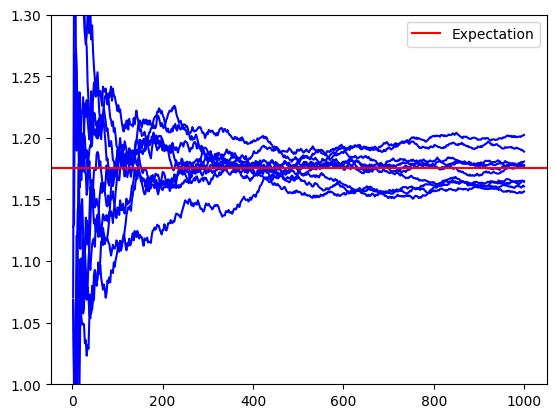

In [ ]:
############################################
## Trajectories of the stratified estimator J_n
## for n = 2, 4, ..., N
############################################
M = int(10)

############################################
# Complete with M x N1 and M x N2 draw
# of the conditionnal laws on strata
X1 = np.random.uniform(-1, 0, size=(M, N1))
X2 = np.random.uniform(0, 1, size=(M, N2))
############################################

J_n = np.zeros((M, int(N/2)))

############################################
# Complete with the calculus of the stratified
# estimator for n@ 2,4,...,N

for n in np.arange(2, N+2, 2):
    n1 = n // 2
    J_n[:, n1-1] = 0.5 * np.mean(np.exp(X1[:, :n1]), axis=1) + 0.5 * np.mean(np.exp(X2[:, :n1]), axis=1)

############################################
# Displaying the trajectories of the stratified estimator
## for n = 2, 4, ..., N

evenIntegers1toN = np.arange(2, N+2, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(evenIntegers1toN, J_n.T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()

#### Question 4: Non-Proportional Stratification (Optional)

Propose a stratification technique based on simulating a proportion $n_1=rn$ of uniform variables on $[-1,0]$, and $n_2=(1-r)n$ of uniform variables on $[0,1]$, with $r \in (0,1)$ such that $n_1$ and $n_2$ are integers.

Plot the trajectories of these estimators as a function of $n$ for various values of $r$.

Non-Proportional Stratification Estimator, r = 0.80 

E[g(Y)] = 1.1752 Var[g(Y)] = 0.4323
J_N = 0.8575  var*N = 0.0001
CI = [0.8403,0.8747] 

Relative Error = 0.0201
Savings in the number of simulations compared to MC : 5611.3631


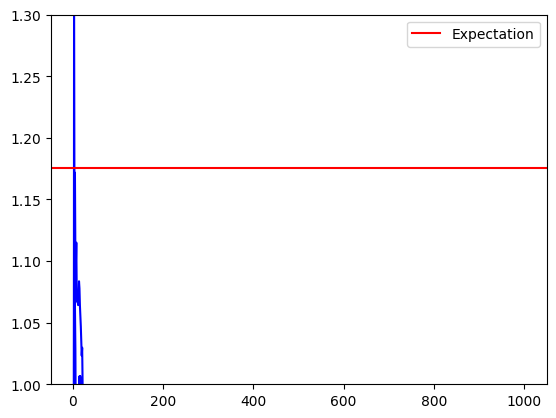

Non-Proportional Stratification Estimator, r = 0.40 

E[g(Y)] = 1.1752 Var[g(Y)] = 0.4323
J_N = 1.2756  var*N = 0.0002
CI = [1.2512,1.3000] 

Relative Error = 0.0191
Savings in the number of simulations compared to MC : 2799.5959


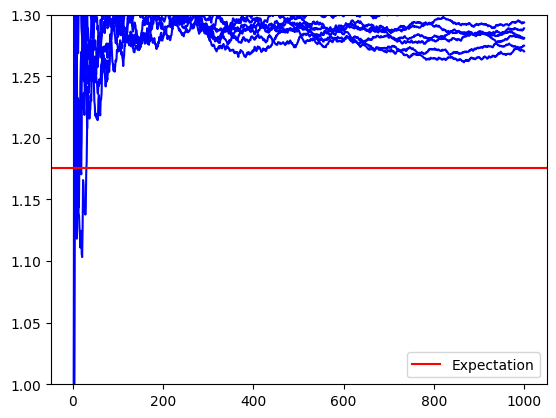

Non-Proportional Stratification Estimator, r = 0.20 

E[g(Y)] = 1.1752 Var[g(Y)] = 0.4323
J_N = 1.5279  var*N = 0.0002
CI = [1.5000,1.5557] 

Relative Error = 0.0182
Savings in the number of simulations compared to MC : 2142.6913


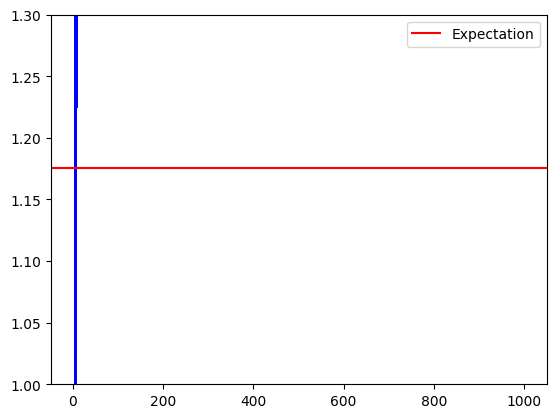

In [ ]:
# Non-Proportional Stratification

def nonProportionalStratification(r):
    N1 = int(N * r)
    N2 = int(N - N1)

    ################
    # Complete with N1 and N2 draws
    # of conditional distributions on strata
    X1 = np.random.uniform(-1, 0, N1)
    X2 = np.random.uniform(0, 1, N2)
    ################

    ################
    # Stratified estimator
    J_N = r * np.mean(np.exp(X1)) + (1-r) * np.mean(np.exp(X2))

    ############################################################
    # Evaluate the variance of the estimator J_N through simulation
    M = 1000 # Number of simulations for variance estimation
    J_N_samples = np.zeros(M)
    for i in range(M):
        X1_sample = np.random.uniform(-1, 0, N1)
        X2_sample = np.random.uniform(0, 1, N2)
        J_N_samples[i] = r * np.mean(np.exp(X1_sample)) + (1-r) * np.mean(np.exp(X2_sample))

    var = np.var(J_N_samples)


    halfWidthCI = 1.96 * np.sqrt(var)

    relativeError = halfWidthCI / J_N

    print("Non-Proportional Stratification Estimator, r = %1.2f \n" %r)

    print("E[g(Y)] = %1.4f Var[g(Y)] = %1.4f" %(Esp_gY, Var_gY))
    print("J_N = %1.4f  var*N = %1.4f" %(J_N, var))
    print("CI = [%1.4f,%1.4f] \n" %(J_N - halfWidthCI, J_N + halfWidthCI))

    print("Relative Error = %1.4f" %relativeError)
    print("Savings in the number of simulations compared to MC : %1.4f" %(Var_gY/var))

    ############################################
    ## Trajectories of the stratified estimator for n=1,..,N
    ############################################
    M = 10

    #####################
    # Complete with M x N1 and M x N2 draws
    # of conditionnal laws on strata
    X1 = np.random.uniform(-1, 0, size=(M, N1))
    X2 = np.random.uniform(0, 1, size=(M, N2))

    Y1 = np.exp(X1); Y2 = np.exp(X2)

    J_n = np.zeros((M, N))

    #####################
    # Complete with the calculus of the stratified
    # estimator for different values of n
    for n in np.arange(int(1/r) if r !=0 else 1, N):
        n1 = int(n * r)
        n2 = n - n1
        if n1 > 0 and n2 > 0:
          J_n[:, n] = r * np.mean(Y1[:, :n1], axis=1) + (1-r) * np.mean(Y2[:, :n2], axis=1)
        elif n1 > 0:
          J_n[:, n] = r * np.mean(Y1[:, :n1], axis=1)
        elif n2 > 0:
          J_n[:, n] = (1-r) * np.mean(Y2[:, :n2], axis=1)


    ############################################
    # Display the trajectories
    integers1toN = np.arange(1, N+1)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(integers1toN, J_n[1:10, :].T, color="b")

    ax.set_ylim(1.0, 1.3)
    ax.axhline(Esp_gY, color="r", label="Expectation")
    ax.legend(loc="best")
    plt.show()

nonProportionalStratification(0.8)
nonProportionalStratification(0.4)
nonProportionalStratification(0.2)

####  Question 5: Optimal stratification on both strata$(S_1,S_2)=([-1,0],[0,1])$ (Optional)

Calculate the values of the parameters
\begin{eqnarray*}
\sigma_1^2&:=&\mathbb{E}\bigl[e^{2X}~|~X\in[-1,0]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[-1,0]\bigl]^2\\
\sigma_2^2&:=&\mathbb{E}\bigl[e^{2X}~|~X\in[0,1]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[0,1]\bigl]^2
\end{eqnarray*}
and propose an optimal stratification technique.
Simulate the empirical estomator associated and plot its trajectories.


In [ ]:
## Explicit Calculation of sigma_1 and sigma_2
sigma_1 = np.sqrt(0.5 * (1. - np.exp(-2.)) - (1. - np.exp(-1.))**2)
sigma_2 = np.sqrt(0.5 * (np.exp(2.) - 1.) - (np.exp(1.) - 1.)**2)

############################################
## Compute the optimal N1
#r = ????
r = sigma_1 / (sigma_1 + sigma_2)


N1 = int(N * r)
N2 = int(N - N1)

############################################
## Simulation of the non-proportional
## stratification estimator with optimal N1
##
## This is the same code as in Question 4: we could directly call
## the nonProportionalStratification(r) function
## The only difference in the code below is that we use
## the explicit variance of the stratified estimator instead of estimating it.
X1 = np.random.uniform(-1, 0, N1)
X2 = np.random.uniform(0, 1, N2)

############################################
# Stratified estimator

J_N = r * np.mean(np.exp(X1)) + (1-r) * np.mean(np.exp(X2))

############################################
## Compute the variance of the optimal J_N estimator
## We can use the explicit expression of the variance of J_N
#var = ?????
theoretical_variance = (r * sigma_1 + (1 - r) * sigma_2)**2 / N


halfWidthCI = 1.96 * np.sqrt(theoretical_variance)
relativeError = halfWidthCI / J_N

############################################
print("Estimator by optimal non-proportional stratification, r_optimal = %1.3f" % r)

print("E[g(Y)] = %1.3f Var[g(Y)] = %1.3f" % (Esp_gY, Var_gY))
print("J_mean = %1.3f  theoretical_variance = %1.3f" % (J_N, theoretical_variance))
print("CI = [%1.3f,%1.3f] \n" % (J_N - halfWidthCI, J_N + halfWidthCI))

print("Relative Error = %1.3f" % relativeError)
print("Savings in the number of simulations compared to MC: %1.2f" % (Var_gY / theoretical_variance))

Estimator by optimal non-proportional stratification, r_optimal = 0.269
E[g(Y)] = 1.175 Var[g(Y)] = 0.432
J_mean = 1.438  theoretical_variance = 0.000
CI = [1.413,1.464] 

Relative Error = 0.018
Savings in the number of simulations compared to MC: 2592.90


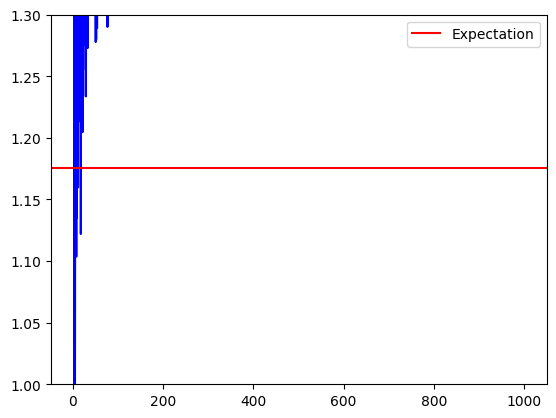

In [ ]:
############################################
# Complete the trajectories of the stratified estimator
# for n = 1, .., N
J_n = np.zeros((M, N))

for n in np.arange(int(1 / r), N):
    n1 = int(n * r)
    n2 = n - n1
    if n1 > 0 and n2 > 0:
      J_n[:, n] = r * np.mean(np.exp(np.random.uniform(-1, 0, size=(M, n1))), axis=1) + (1-r) * np.mean(np.exp(np.random.uniform(0, 1, size=(M, n2))), axis=1)
    elif n1 > 0:
      J_n[:, n] = r * np.mean(np.exp(np.random.uniform(-1, 0, size=(M, n1))), axis=1)
    elif n2 > 0:
      J_n[:, n] = (1-r) * np.mean(np.exp(np.random.uniform(0, 1, size=(M, n2))), axis=1)

############################################
# Displaying the trajectories
integers1toN = np.arange(1, N + 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n[1:10, :].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()